In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#vérifions les doublons
df.duplicated().sum()

0

In [10]:
df.drop(['Id'], axis=1, inplace=True)

## Gestion des valeurs manquantes

In [11]:
# proportion des valeurs manquantes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
missing_values_percent = df.isnull().mean() * 100
print(missing_values_percent)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [12]:
# affricher les colonnes qui cotiennent de valeurs manquantes
columns_with_missing = missing_values_percent[missing_values_percent > 0]
print(columns_with_missing)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


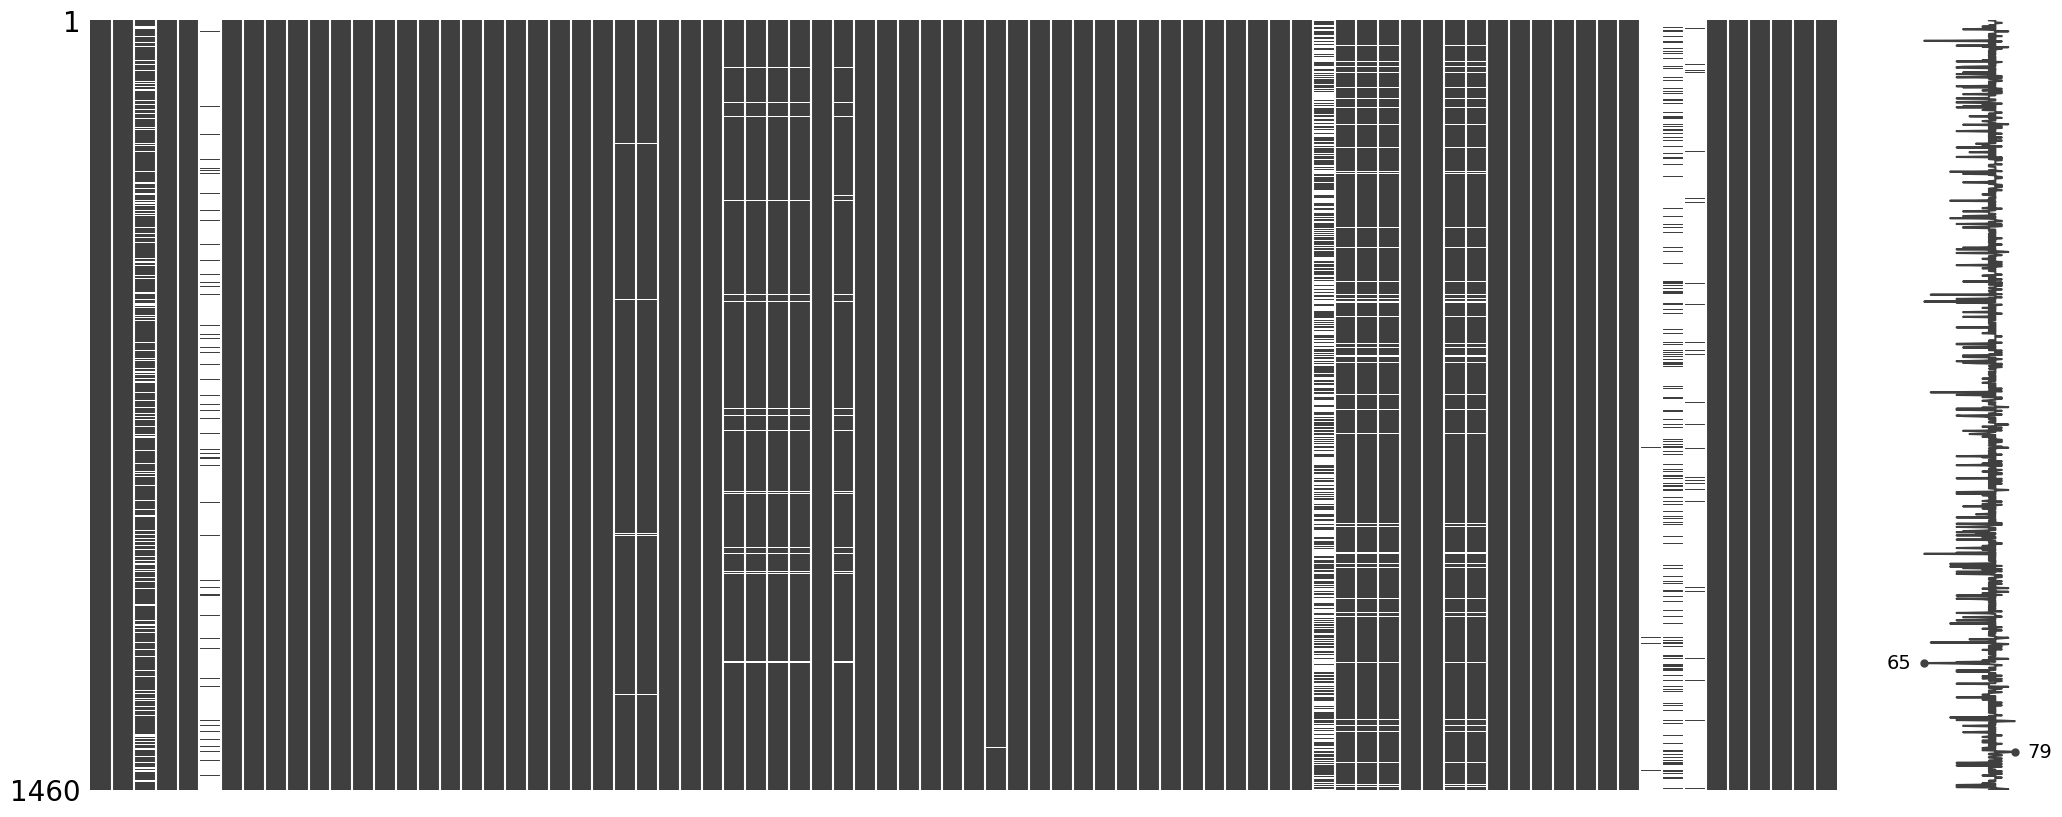

In [13]:
# Visualisation des valeurs manquantes sous forme de matrice
msno.matrix(df)
plt.show()

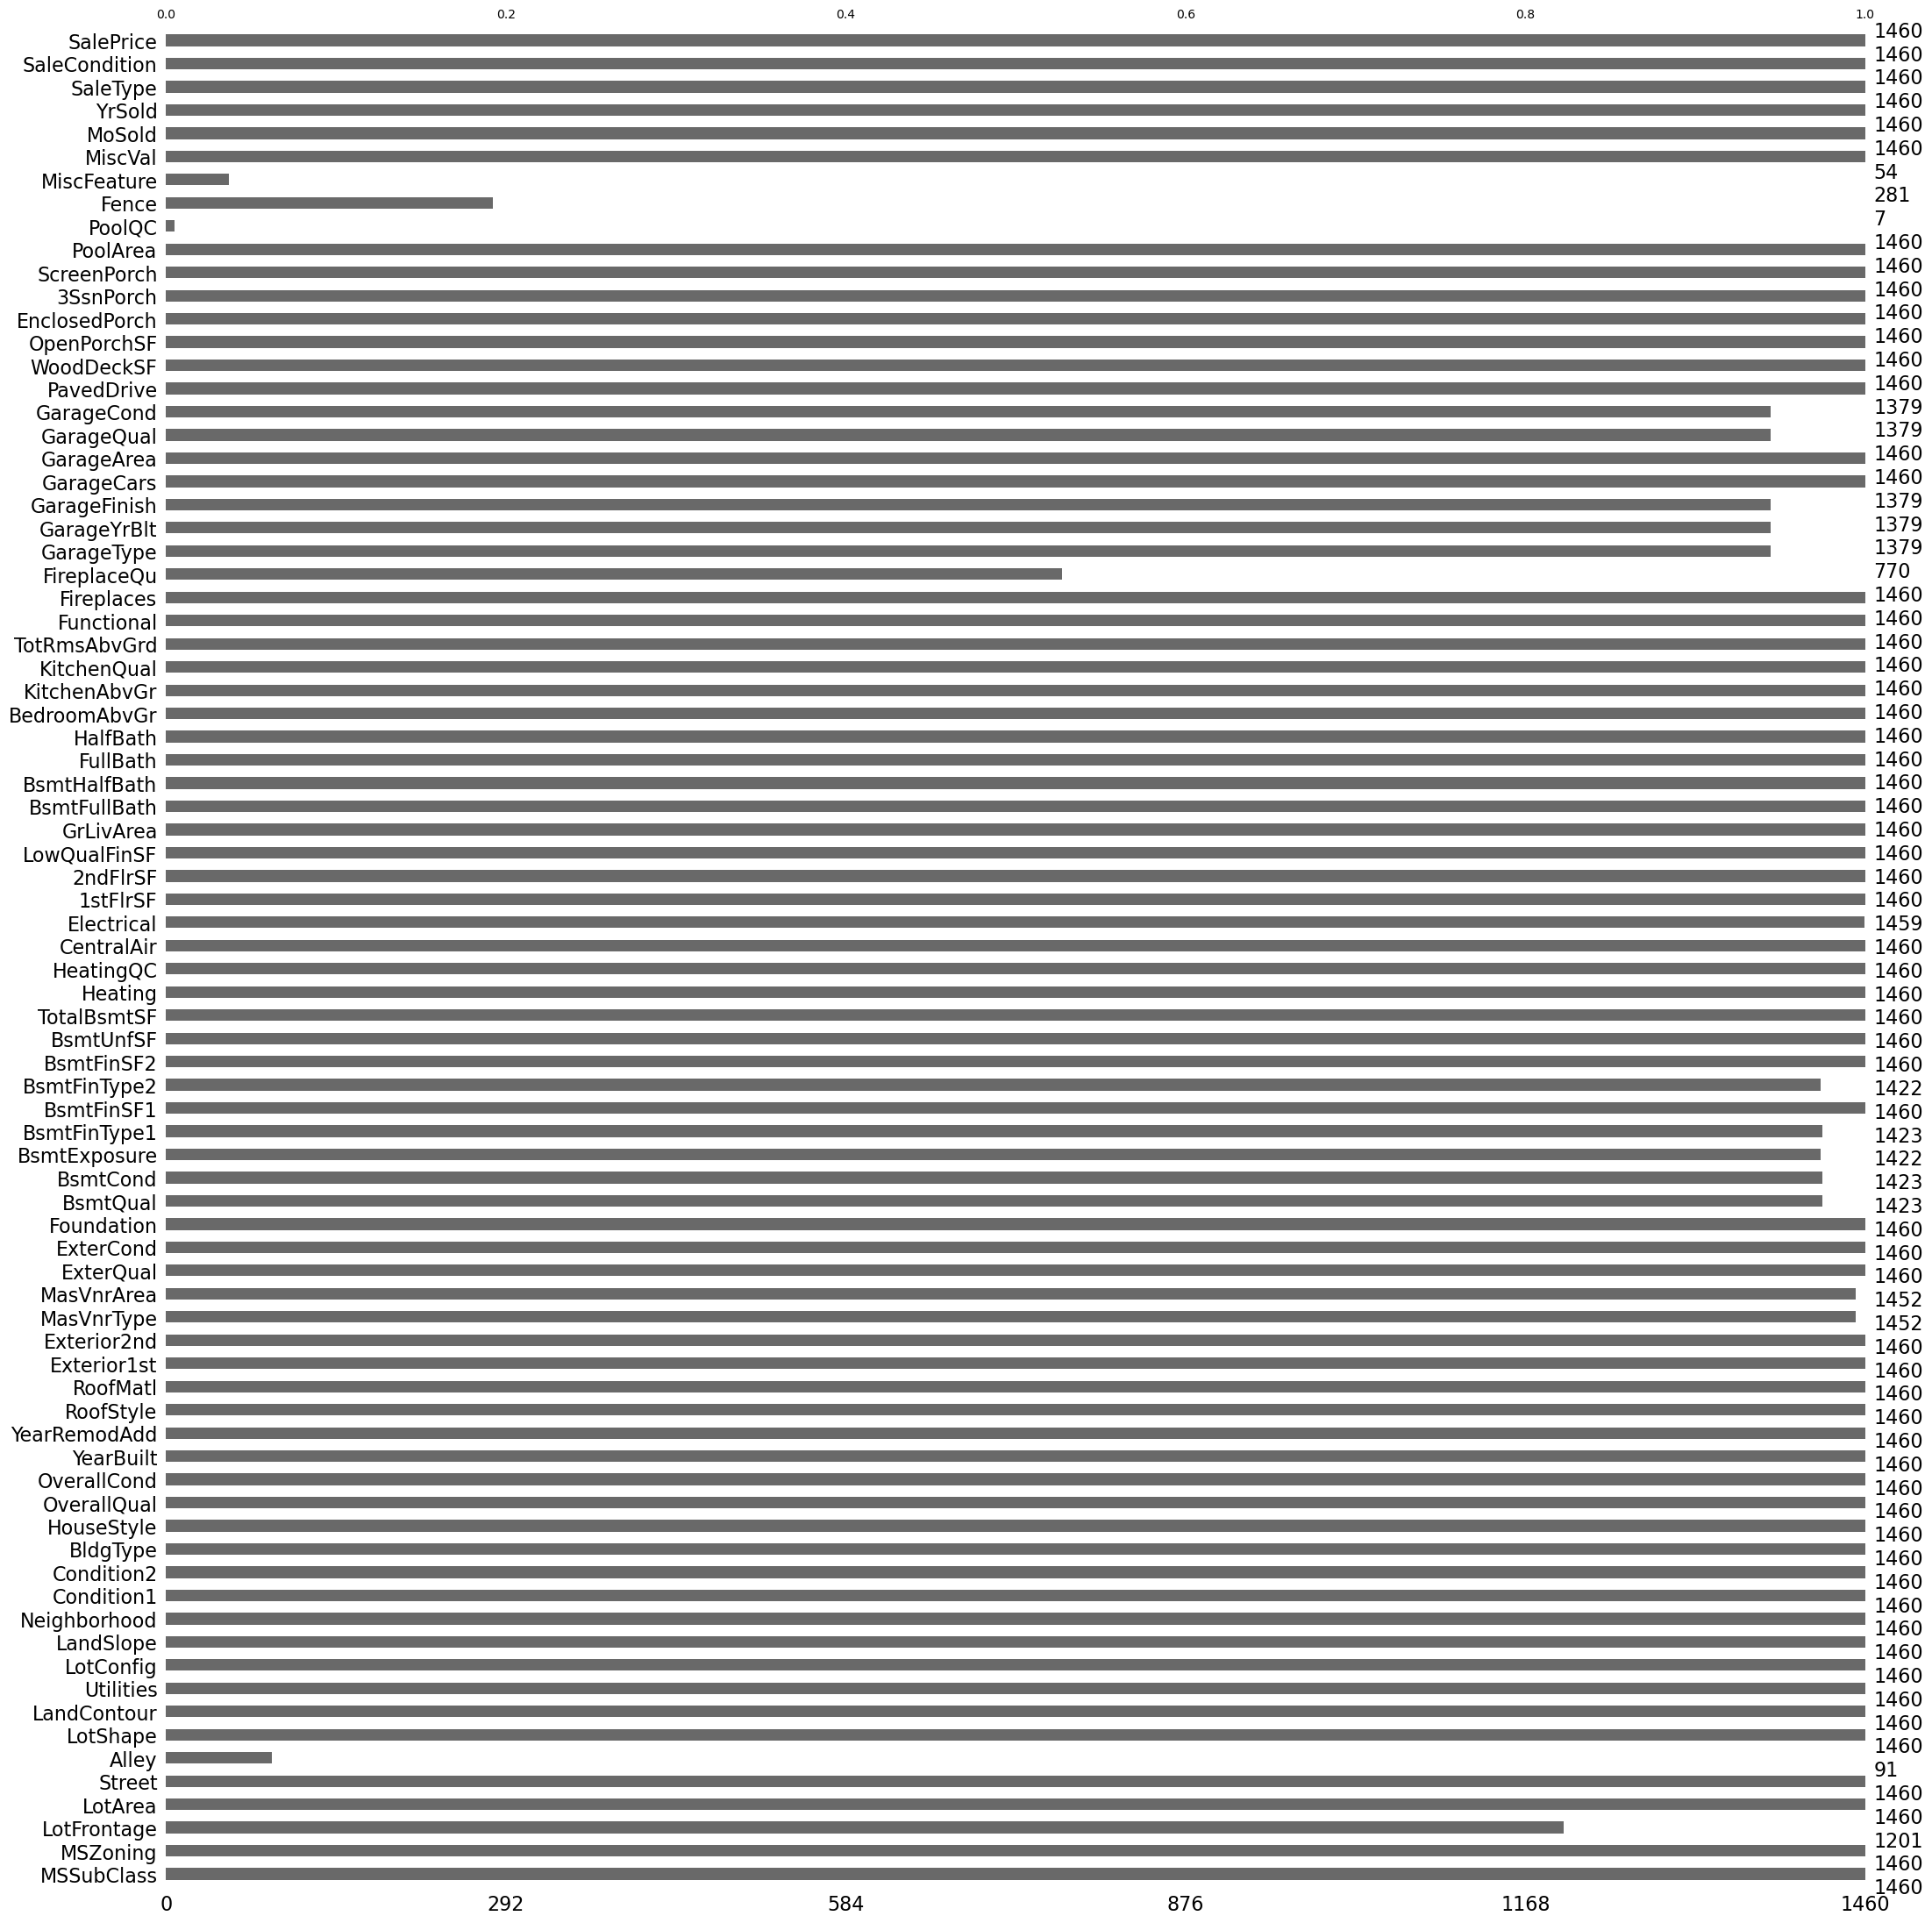

In [14]:
# Visualisation sous forme de barres
msno.bar(df)
plt.show()

In [15]:
#  Supprimer les colonnes dont la proportion de valeurs manquantes est supérieure à 30
seuil=0.30
df1=df.dropna(axis=1, thresh=int((1-seuil) * len(df)))

In [16]:
# Imputation des valeurs manquantes
def impute_missing_values(df):
    """
    Remplace les valeurs manquantes par la moyenne pour les colonnes numériques
    et par le mode pour les colonnes catégoriques.

    Args:
        df (pandas.DataFrame): Le DataFrame avec des valeurs manquantes.

    Returns:
        pandas.DataFrame: Le DataFrame avec les valeurs manquantes imputées.
    """
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            # Remplacer les valeurs manquantes par la moyenne
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # Remplacer les valeurs manquantes par le mode
            df[column].fillna(df[column].mode()[0], inplace=True)
    
    return df

In [17]:
df2=impute_missing_values(df1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5688\2000563145.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5688\2000563145.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5688\2000563145.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
df2.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

## Analyse Exploratoire des Données

C:\Users\DELL\AppData\Local\Temp\ipykernel_5688\3015108381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

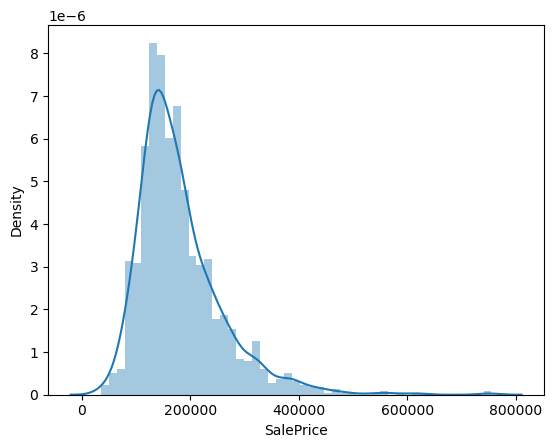

In [19]:
sns.distplot(df2['SalePrice'])

La distribution des prix de vente est asymétrique à droite (skewness positive). La majorité des prix de vente sont regroupés vers les valeurs plus basses, avec moins d'observations à des prix plus élevés.

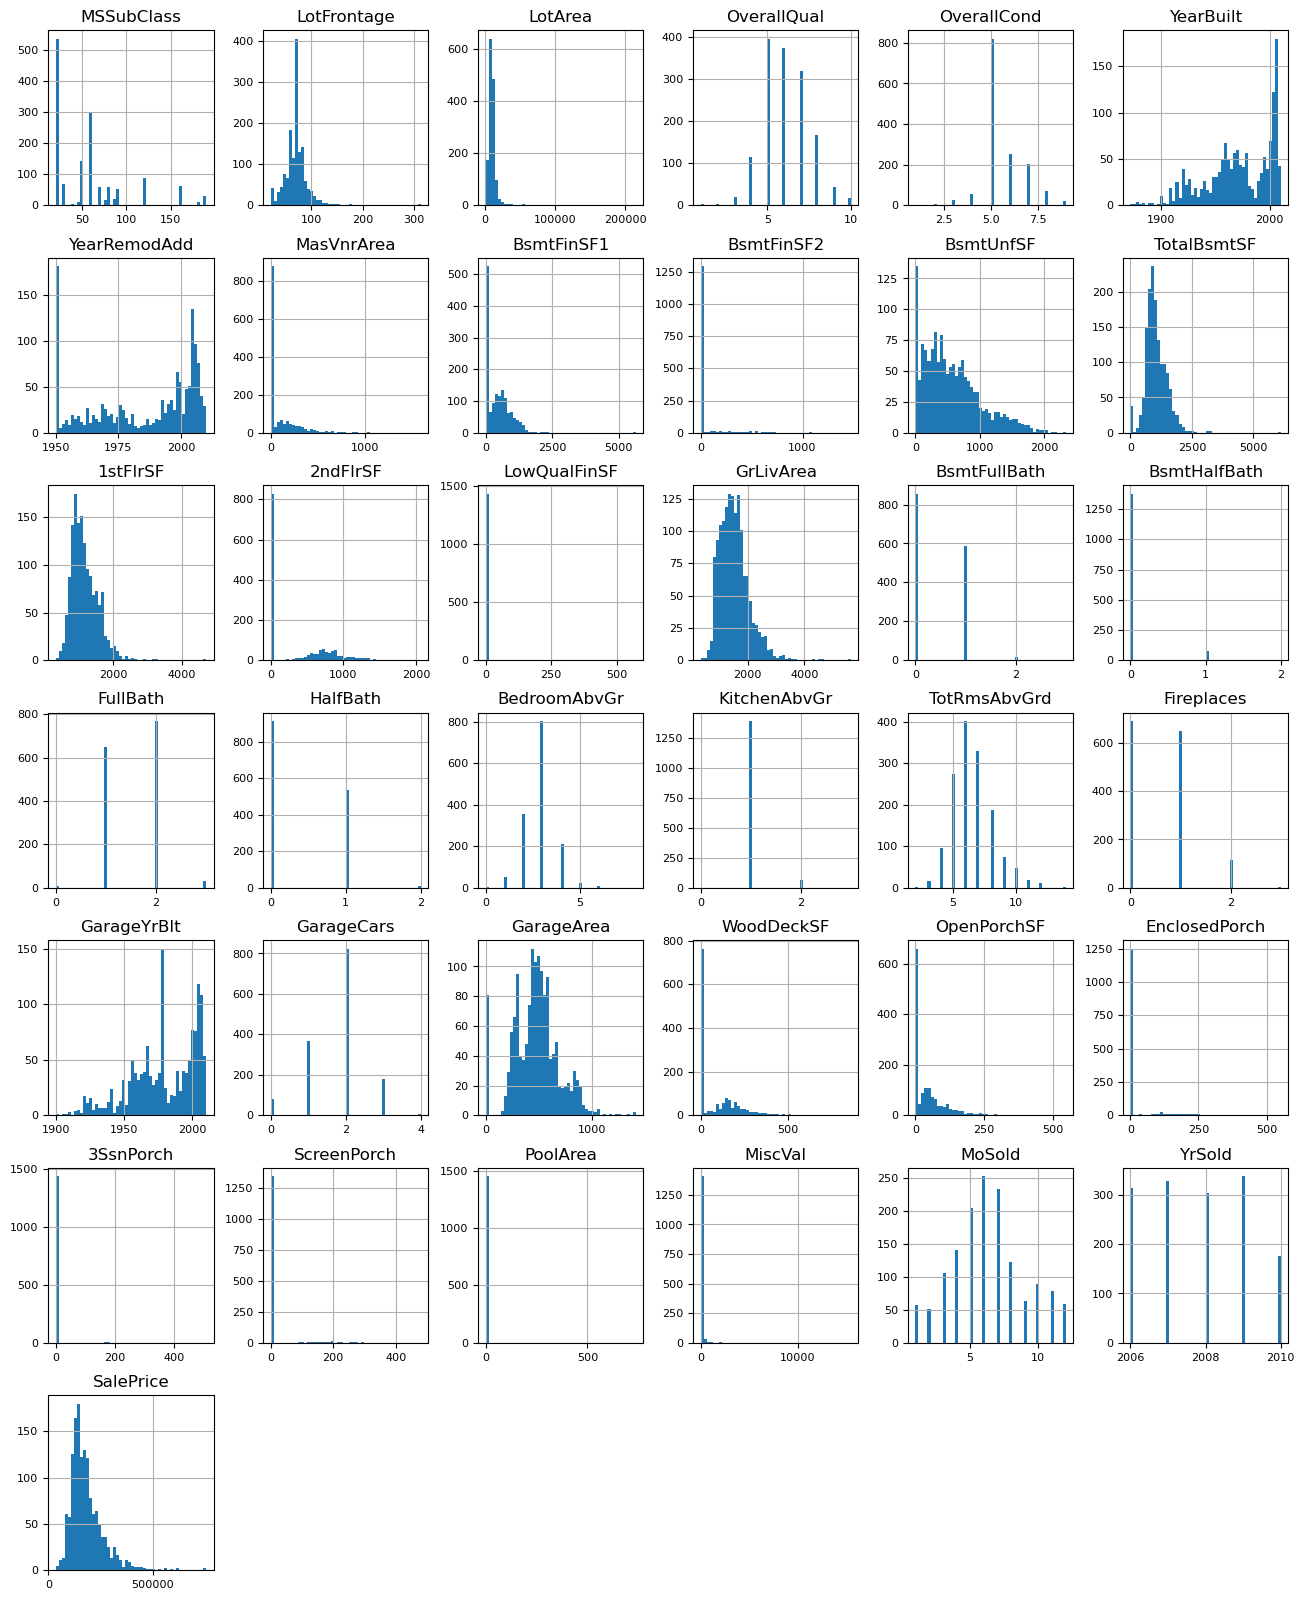

In [20]:
# selectionner les variables numériques et tracer des histogramme
numeric_columns = df2.select_dtypes(include=['int64', 'float64'])
# Tracer tous les histogrammes dans une seule figure
numeric_columns.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()


La majorité des variables explicatives montrent une asymétrie et contiennent des valeurs aberrantes. Certaines caractéristiques n'ont pas de valeurs aberrantes et se comportent normalement.

### Normalisation des variables

In [21]:
# Appliquer la transformation logarithmique sur les colonnes numériques
numeric_columns_log = np.log(df2[numeric_columns.columns] + 1)  # Ajouter 1 pour éviter log(0)

In [22]:
df2[numeric_columns.columns] = numeric_columns_log # on remplace les variables normalisées dans df2

C:\Users\DELL\AppData\Local\Temp\ipykernel_5688\2494754337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[numeric_columns.columns] = numeric_columns_log # on remplace les variables normalisées dans df2


C:\Users\DELL\AppData\Local\Temp\ipykernel_5688\3779463990.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

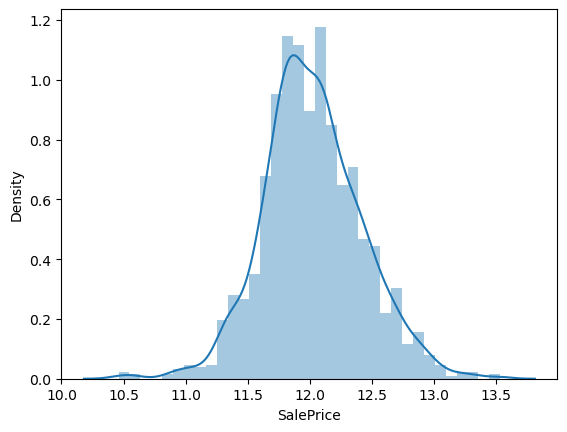

In [23]:
# verification sur la variable cible
sns.distplot(df2['SalePrice'])

### Corrélation entre les variables

C:\Users\DELL\AppData\Local\Temp\ipykernel_5688\2628020877.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


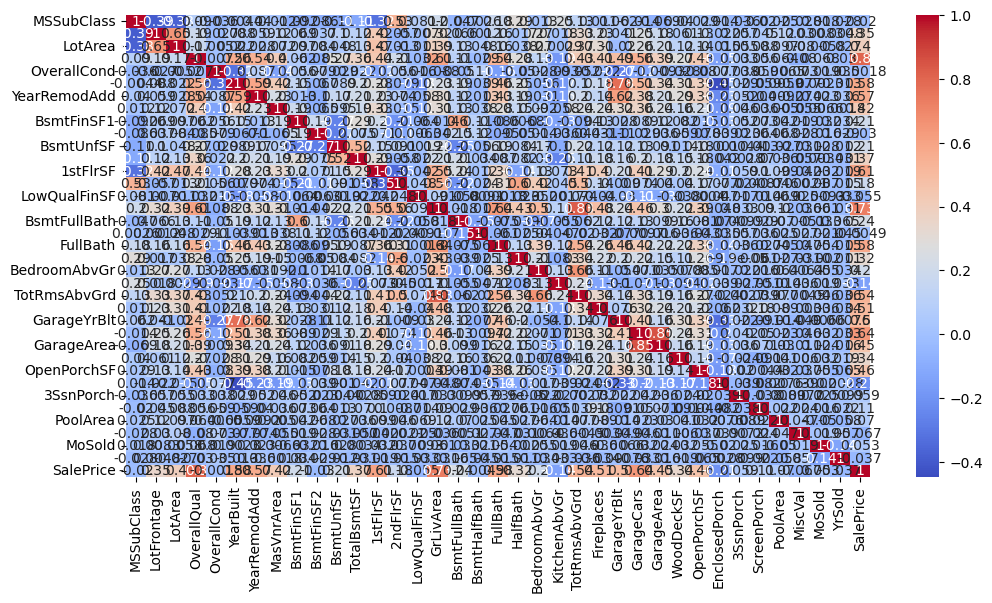

SalePrice        1.000000
OverallQual      0.802067
GrLivArea        0.730254
GarageCars       0.641561
1stFlrSF         0.608955
YearBuilt        0.584443
FullBath         0.580297
YearRemodAdd     0.565590
TotRmsAbvGrd     0.539998
Fireplaces       0.508925
GarageYrBlt      0.498631
OpenPorchSF      0.459948
GarageArea       0.454898
MasVnrArea       0.420330
LotArea          0.399923
TotalBsmtSF      0.372838
LotFrontage      0.346668
WoodDeckSF       0.343039
HalfBath         0.320925
BsmtFullBath     0.238945
BsmtUnfSF        0.208233
BsmtFinSF1       0.208099
BedroomAbvGr     0.197664
2ndFlrSF         0.180778
ScreenPorch      0.105857
PoolArea         0.069949
3SsnPorch        0.058827
MoSold           0.053096
OverallCond     -0.001794
BsmtHalfBath    -0.004890
MSSubClass      -0.020279
BsmtFinSF2      -0.030361
YrSold          -0.037261
LowQualFinSF    -0.054513
MiscVal         -0.067054
KitchenAbvGr    -0.144278
EnclosedPorch   -0.207263
Name: SalePrice, dtype: float64


In [24]:
# la matrice de corrélation
correlation_matrix = df2.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Corrélation avec la variable cible
corr_with_target = correlation_matrix["SalePrice"].sort_values(ascending=False)
print(corr_with_target)

 Les variables telles que **'OverallQual', 'GrLivArea', et 'GarageCars'** montrent une forte corrélation positive avec **SalePrice**, ce qui signifie qu'une augmentation de ces variables est fortement associée à une augmentation du prix de vente.

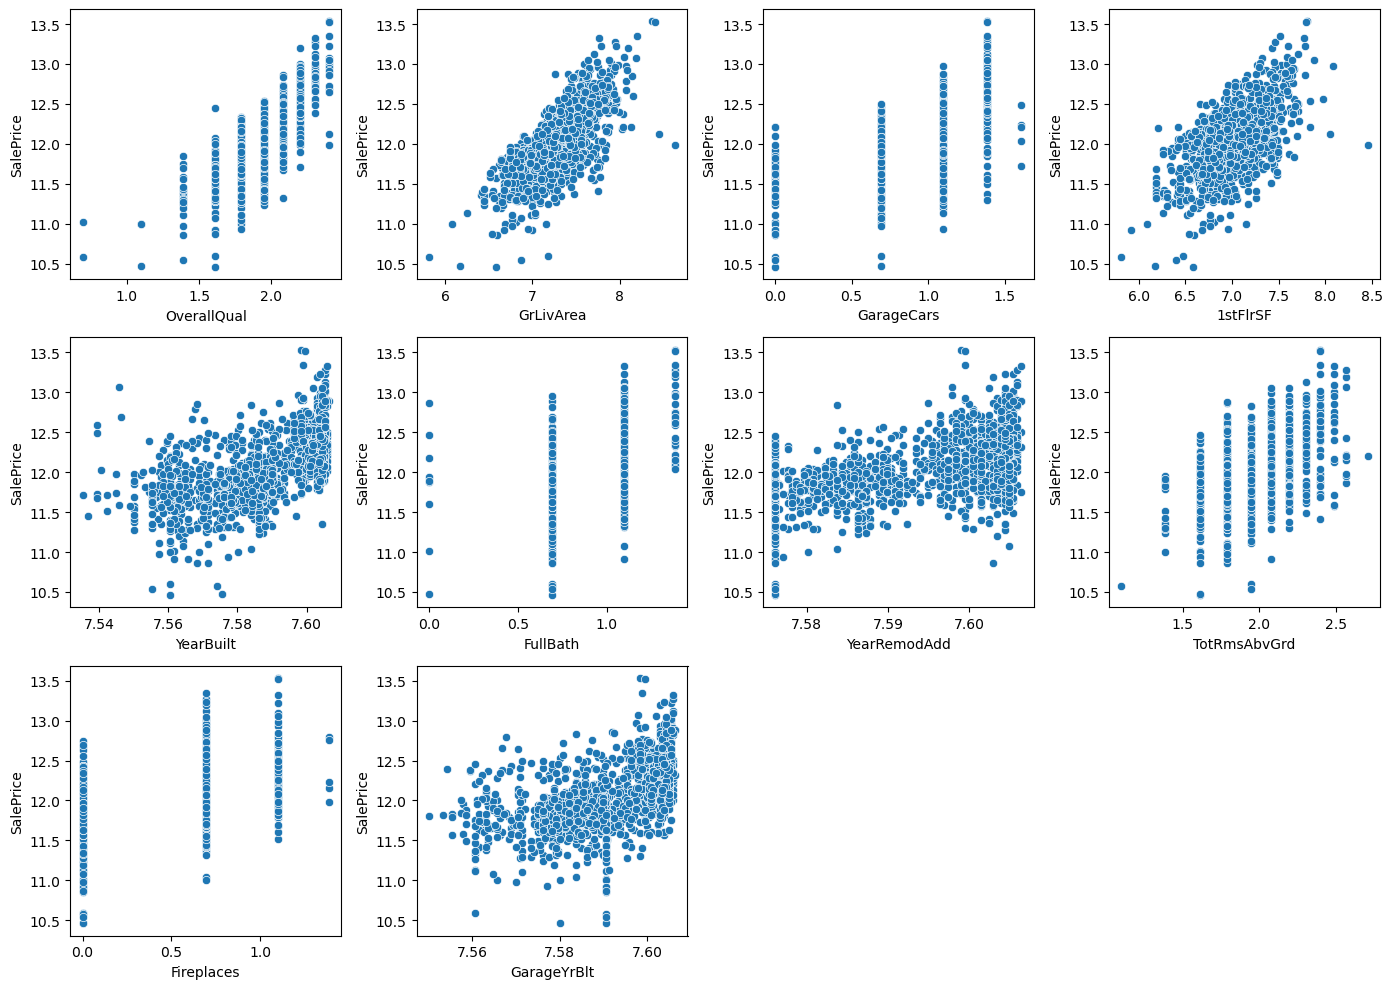

In [25]:
# Sélectionner les variables avec une corrélation élevée
top_corr_features = corr_with_target.index[1:11]  # Les 10 meilleures corrélations après SalePrice

# Tracer les scatterplots
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_corr_features):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=df2[feature], y=df2['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

### Encodage des variables catégoriques

Visualisez les variables catégorielles

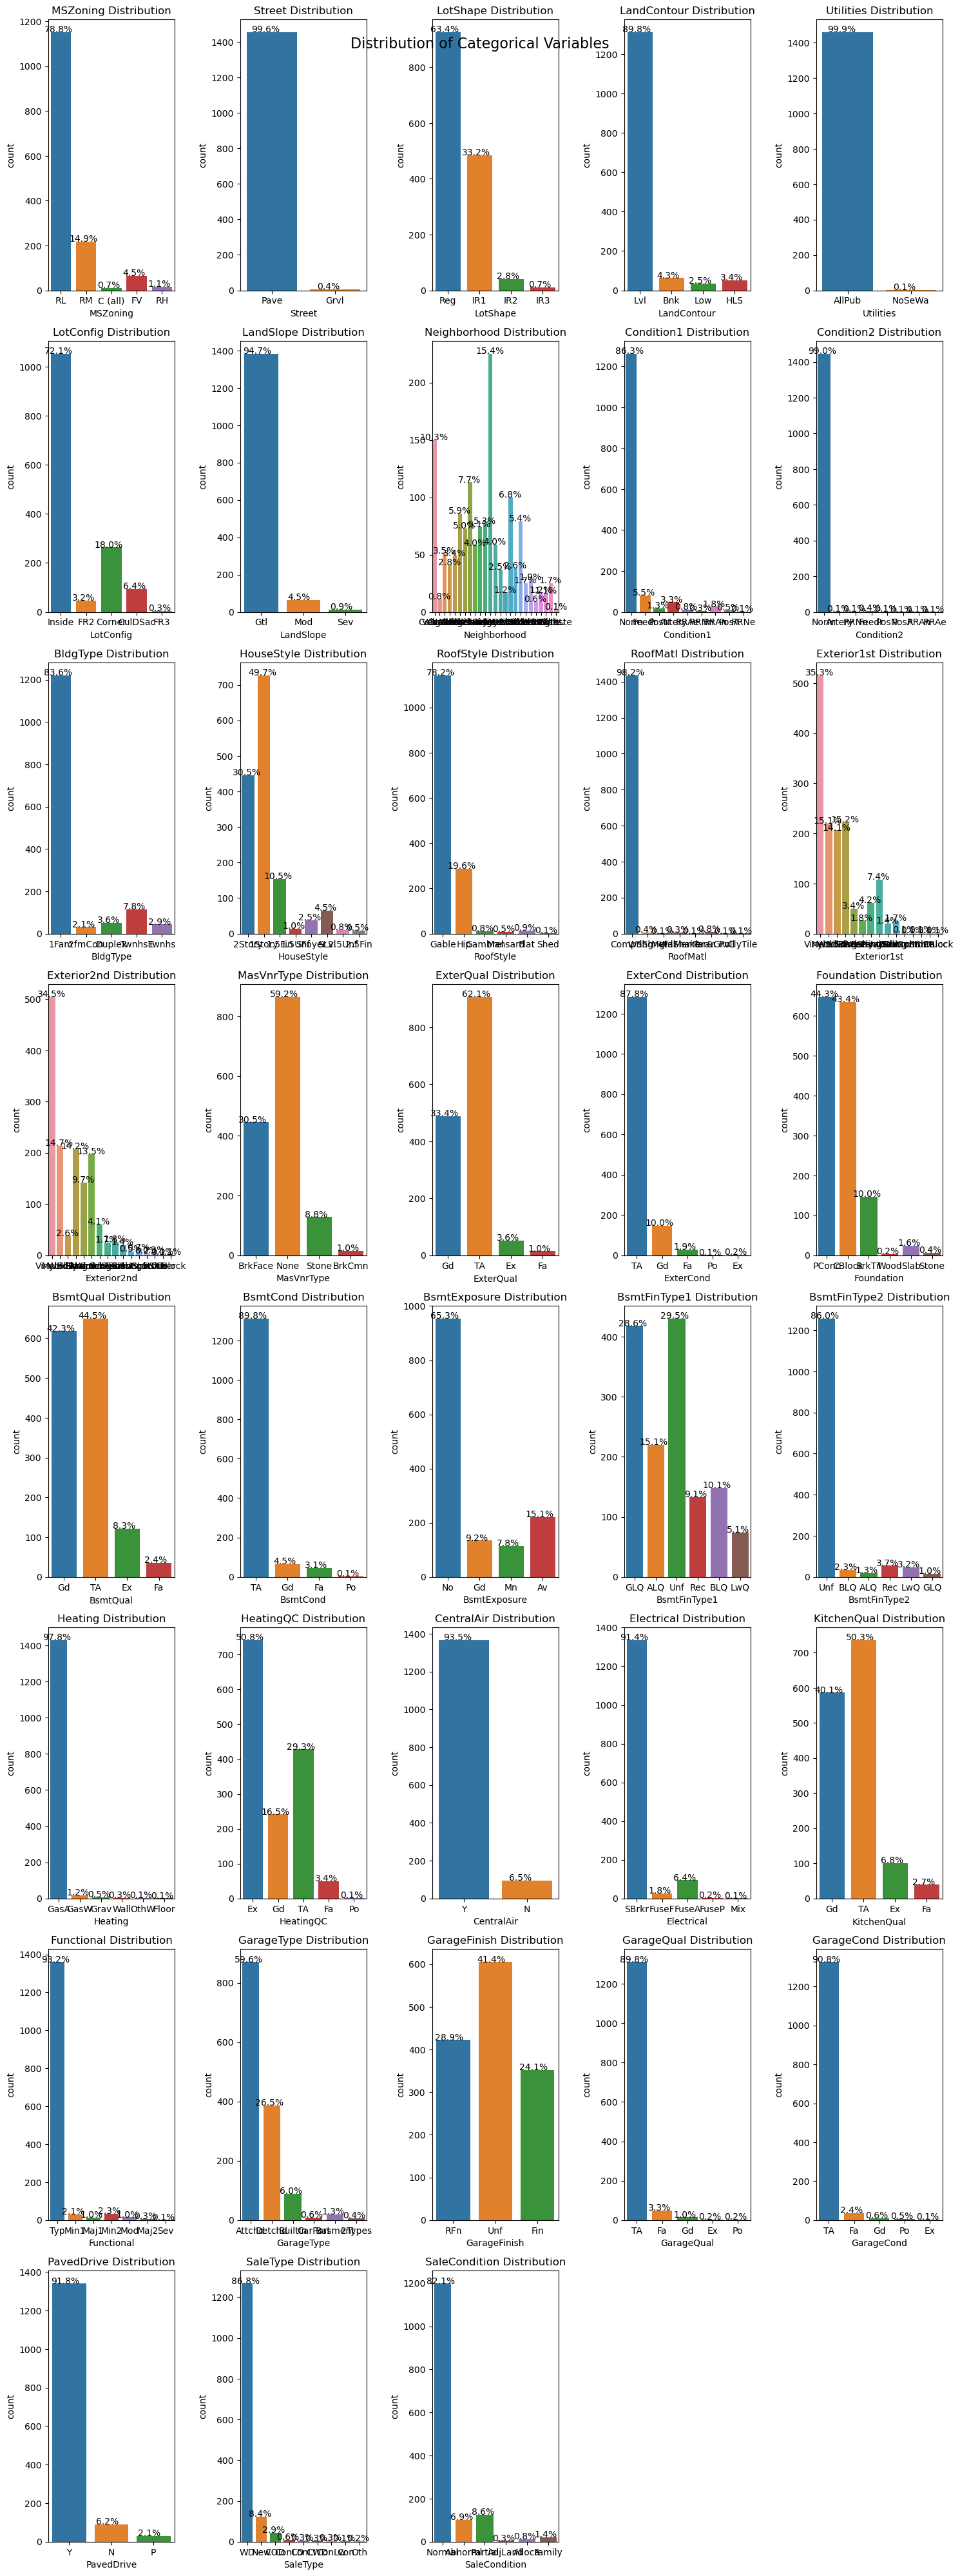

In [27]:
# Sélectionner les colonnes catégorielles
categorical_columns = df2.select_dtypes(include=['object']).columns

# Définir le nombre de subplots
num_plots = len(categorical_columns)
num_cols = 5  # Nombre de colonnes de subplots
num_rows = (num_plots // num_cols) + (num_plots % num_cols)  # Calculer le nombre de lignes

# Créer la figure et les axes de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Parcourir les colonnes catégorielles et créer des barplots
for i, col in enumerate(categorical_columns):
    # Créer le barplot
    sns.countplot(data=df, x=col, ax=axes[i])
    
    axes[i].set_title(f'{col} Distribution')

    # Ajouter des labels en pourcentage au-dessus des barres
    total = len(df[col])
    for p in axes[i].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center')

# Supprimer les axes inutilisés si num_plots n'est pas un multiple de num_cols
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])
    
    
fig.suptitle('Distribution of Categorical Variables', fontsize=16)
# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les subplots
plt.show()


Les variables **Street, Utilities, LandSlope, Condition2, RoofMatl, Heating, Functional, CentralAir, GarageQual, GarageCond** présentent une distribution fortement déséquilibrée, avec une catégorie dominante représentant presque l'ensemble des observations. Ces variables peuvent avoir une faible variance informative et pourraient être candidates à l'exclusion du modèle.
Certaines catégories au sein de ces variables ont des fréquences très faibles. Les variables  **GarageQual et GarageCond** semblent capturer des informations similaires.

In [28]:
df2['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [29]:
df2['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [30]:
# supprimer les variables à variance faible
variables_drop=['Street', 'Utilities']
df2.drop(columns=variables_drop, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5688\3362848151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=variables_drop, inplace=True)


In [31]:
df2.shape

(1460, 73)

In [32]:
# encoder la variable CentralAir
df2['CentralAir'] = df2['CentralAir'].map({'Y': 1, 'N': 0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_5688\3325337681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CentralAir'] = df2['CentralAir'].map({'Y': 1, 'N': 0})


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   float64
 14  OverallCond    1460 non-null   float64
 15  YearBuilt      1460 non-null   float64
 16  YearRemodAdd   1460 non-null   float64
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [35]:
df2.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

In [36]:
# Identification des colonnes catégorielles et numériques
categorical_features = df2.select_dtypes(include=['object']).columns.tolist()
numeric_features = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [37]:
# Appliquer One-Hot Encoding pour les colonnes catégorielles
df2_encoded = pd.get_dummies(df2, columns=categorical_features, drop_first=True)

In [38]:
df2_encoded.shape

(1460, 231)

In [39]:
df2_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,6.753438,1,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.000000,7.602900,1.098612,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,1.098612,7.605392,12.247699,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,

In [40]:
df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 231 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(37), int64(1), uint8(193)
memory usage: 708.7 KB


In [41]:
df2_encoded.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
CentralAir               0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
S

## Modélisation

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
# Préparation des données
X = df2_encoded.drop(columns=['SalePrice'])
y = df2_encoded['SalePrice']

In [44]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Prédire sur les données de test
y_pred= model.predict(X_test)
# Évaluation des performances
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 0.026101536094458252
MAE: 0.09092635894589882
R²: 0.8601286221577175


### La sélection des variables

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [48]:
# Sélections des variables 
# Modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(df2_encoded.drop(columns=['SalePrice']), df2_encoded['SalePrice'])

# Sélection des variables importantes
selector = SelectFromModel(model, threshold="mean", prefit=True)
X_selected_rf = selector.transform(df2_encoded.drop(columns=['SalePrice']))

print(f'Nombre de variables sélectionnées par RandomForest: {X_selected_rf.shape[1]}')
print(f'Variables sélectionnées par RandomForest: {df2_encoded.columns[:-1][selector.get_support()].tolist()}')

Nombre de variables sélectionnées par RandomForest: 17
Variables sélectionnées par RandomForest: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea', 'GarageFinish_RFn']


c:\Users\DELL\Downloads\Anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Modélisation après la sélection des variables

In [49]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X=df2_encoded.drop(columns=['SalePrice'])
y=df2_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [50]:
# Extraire les variables sélectionnées
selected_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                     'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
                     'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea', 'GarageFinish_RFn']

# Préparer les données d'entraînement avec les variables sélectionnées
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


### entraînement et évaluation des modèles

In [71]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

model_lr = LinearRegression()

model_lr.fit(X_train_selected, y_train)

LinearRegression()

In [72]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
# Prédire sur les données de test
y_pred_lr = model_lr.predict(X_test_selected)

# Évaluer le modèle
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'leaner regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')

# Validation croisée
scores = cross_val_score(model_lr, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'MSE moyen (Validation croisée): {-scores.mean()}')

leaner regression - MSE: 0.02198396936764519, MAE: 0.10579399363192538, R²: 0.8821935967765545
MSE moyen (Validation croisée): 0.021901448292471003


In [73]:
y_pred_lr

array([11.94866313, 12.58928613, 11.64954578, 12.01783587, 12.5826496 ,
       11.19707614, 12.40507351, 11.92259298, 11.21299985, 11.77643434,
       11.82804301, 11.67181842, 11.36083199, 12.23337141, 12.12952369,
       11.80003746, 12.22743626, 11.83819686, 11.57807356, 12.28614151,
       12.10256896, 12.22013982, 12.10696636, 11.7004795 , 12.22639419,
       12.02876532, 12.19720895, 11.56928339, 12.118605  , 12.13722185,
       11.6799773 , 12.45960443, 12.21719564, 11.5674538 , 12.49107158,
       11.90586204, 11.83381628, 12.27469087, 12.6823242 , 11.44832162,
       11.76528383, 12.40996501, 11.68795834, 12.5493937 , 11.74161595,
       11.69051003, 11.61511131, 11.71382003, 12.74490579, 11.79349984,
       11.64973136, 12.20495818, 11.64773111, 12.67571558, 11.91041723,
       12.38155561, 12.28028809, 11.95943476, 11.95574813, 11.57007363,
       11.0376599 , 11.87208065, 12.52182904, 12.42853191, 12.55581933,
       12.36979128, 11.51263865, 12.62142586, 11.73322928, 12.04

In [74]:
y_test

892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
614     11.231901
218     12.649158
1160    11.891369
649     11.344519
887     11.816734
576     11.884496
1252    11.775297
1061    11.302217
567     12.273736
1108    12.106258
1113    11.809327
168     12.119975
1102    11.813037
1120    11.681832
67      12.328295
1040    11.951187
453     12.254868
670     12.063939
1094    11.767575
192     12.165256
123     11.944065
415     12.106998
277     11.856522
433     12.106258
1317    12.249616
184     11.751950
554     12.556733
1173    12.208575
76      11.818578
906     12.449023
674     11.849405
1398    11.835016
374     12.299112
1032    12.644331
259     11.482477
51      11.648339
244     12.230770
1101    11.691080
581     12.442306
679     11.763692
1132    11.674202
1220    11.652696
49      11.751950
591     13.021329
1269    11.877576
1249    11.686887
1138    12.185875
490     11.652696
1024    12.567241
811     11.881042
141     12

In [55]:
import xgboost as xgb

In [75]:
# Créer le modèle XGBoost
model_XGBR = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Entraîner le modèle
model_XGBR.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [76]:
# Prédire sur les données de test
y_pred_XGBR = model_XGBR.predict(X_test_selected)

# Évaluer le modèle
mse_XGBR = mean_squared_error(y_test, y_pred_XGBR)
mae_XGBR = mean_absolute_error(y_test, y_pred_XGBR)
r2_XGBR = r2_score(y_test, y_pred_XGBR)

print(f'XGBoost - MSE: {mse_XGBR}, MAE: {mae_XGBR}, R²: {r2_XGBR}')
# Validation croisée
scores = cross_val_score(model_XGBR, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'MSE moyen (Validation croisée): {-scores.mean()}')

XGBoost - MSE: 0.025176104791990405, MAE: 0.10792581984212639, R²: 0.8650877690411087
MSE moyen (Validation croisée): 0.022501849013447373


In [77]:
# Le gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

# Entraînement du modèle
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train_selected, y_train)


GradientBoostingRegressor(random_state=42)

In [78]:
# Prédiction
y_pred_gb = model_gb.predict(X_test_selected)

# Évaluation du modèle
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - MSE: {mse_gb}, MAE: {mae_gb}, R²: {r2_gb}')

# Validation croisée
cv_scores_gb = cross_val_score(model_gb, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')

print(f'Gradient Boosting - MSE moyen (Validation croisée): {-cv_scores_gb.mean()}')

Gradient Boosting - MSE: 0.020314543561028964, MAE: 0.09845427001670637, R²: 0.8911396176901073
Gradient Boosting - MSE moyen (Validation croisée): 0.018968797556462642


In [79]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Entraînement du modèle
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

In [80]:
# Prédiction
y_pred_rf = model_rf.predict(X_test_selected)

# Évaluation du modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
#Validation croisée
cv_scores_rf = cross_val_score(model_rf, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest - MSE moyen (Validation croisée): {-cv_scores_rf.mean()}')

Random Forest - MSE: 0.02221507866967889, MAE: 0.09974600590429493, R²: 0.8809551418292809
Random Forest - MSE moyen (Validation croisée): 0.02120148224279806


## Exporter le modèle 

In [101]:
import joblib
# Sauvegarder le modèle 
joblib.dump(model_lr, 'model_lr.jbl')


['model_lr.jbl']